---
# <center>Setup<center>
---

In [ ]:
# Install any neccessary libraries from the requirements file
%pip install -r requirements.txt 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
# A customized pallete with a specific font
my_colors=sns.set_palette("icefire", n_colors=10)
sns.set_theme(style="dark", palette=my_colors, font="Verdana")


In [4]:
# How many rows and columns to be displayed
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

---
# <center>Read and Inspect Data</center>
---

### **Data** ###
- `Link`:https://www.kaggle.com/datasets/dansbecker/powerlifting-database
- `Link`: https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html To understand the data a little better `[Documentation of the Data]`

### 1. Read Data ###

In [5]:
df= pd.read_csv("F:/preprocessing_exploration/openpowerlifting.csv") # The location of the data
df.shape

(386414, 17)

### 2. Inspect Data ###

In [6]:
df.sample(5) 

MeetID                    Name Sex   Equipment   Age  \
164215    5525               Mark Bell   M   Multi-ply  35.0   
203567    6063          Elijah Sanchez   M  Single-ply   NaN   
8389       119  Sandra Coopman-Roberts   F         Raw  54.0   
1356        24          Daniel Fechner   M       Wraps   NaN   
325340    7639               Tom Knuth   M         Raw  57.0   

                Division  BodyweightKg WeightClassKg  Squat4Kg  BestSquatKg  \
164215            M-H-MP        123.60          110+       NaN       475.00   
203567              Boys         96.07           100       NaN       285.76   
8389         F_MR_3_AAPF        114.30           90+       NaN          NaN   
1356           DT-T18/19         80.38          82.5       NaN       212.50   
325340  Men Master 55‐59        113.85           125       NaN          NaN   

        Bench4Kg  BestBenchKg  Deadlift4Kg  BestDeadliftKg  TotalKg Place  \
164215       NaN          NaN          NaN          347.50      NaN    DQ   
203567       NaN       190.51          NaN          249.48   725.75     6   
8389         NaN        77.50          NaN          107.50   185.00     1   
1356         NaN       120.00          NaN          260.00   592.50     1   
325340       NaN       147.50          NaN             NaN   147.50     1   

         Wilks  
164215     NaN  
203567  449.19  
8389    149.26  
1356    403.30  
325340   85.94

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

---
# <center>Clean Data<center>
---


### 1. Rename Columns ###

In [8]:
col_map={"MeetID": "meet_id", 
         "Name": "name", 
         "Sex": "gender", 
        "Equipment": "equipment", 
        "Age": "age", 
        "Division": "division",
        "BodyweightKg": "body_weight_kg", 
        "WeightClassKg": "weight_class_kg",
        "Squat4Kg": "squat_4kg", 
        "BestSquatKg": "best_squat_kg", 
        "Bench4Kg": "bench_4kg",
        "BestBenchKg": "best_bench_kg", 
        "Deadlift4Kg": "deadlift_4kg",
        "BestDeadliftKg": "best_deadlift_kg", 
        "TotalKg": "total_kg", 
        "Place": "place", 
        "Wilks":"wilks"}
df.rename(col_map, axis=1, inplace=True)

In [9]:
df.columns

Index(['meet_id', 'name', 'gender', 'equipment', 'age', 'division',
       'body_weight_kg', 'weight_class_kg', 'squat_4kg', 'best_squat_kg',
       'bench_4kg', 'best_bench_kg', 'deadlift_4kg', 'best_deadlift_kg',
       'total_kg', 'place', 'wilks'],
      dtype='object')

### 2. Changing Data Types ###

In [10]:
df.dtypes

meet_id               int64
name                 object
gender               object
equipment            object
age                 float64
division             object
body_weight_kg      float64
weight_class_kg      object
squat_4kg           float64
best_squat_kg       float64
bench_4kg           float64
best_bench_kg       float64
deadlift_4kg        float64
best_deadlift_kg    float64
total_kg            float64
place                object
wilks               float64
dtype: object

In [11]:
# Making the column as an "object" because it's irrelevant in our work
df["meet_id"]=df["meet_id"].astype("object")

In [12]:
df.dtypes

meet_id              object
name                 object
gender               object
equipment            object
age                 float64
division             object
body_weight_kg      float64
weight_class_kg      object
squat_4kg           float64
best_squat_kg       float64
bench_4kg           float64
best_bench_kg       float64
deadlift_4kg        float64
best_deadlift_kg    float64
total_kg            float64
place                object
wilks               float64
dtype: object

### 3. Duplications 

In [13]:
df.duplicated().sum()

np.int64(545)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

### 4. Missing Values ###

In [16]:
from utils import check_na
missing=check_na(df)
missing

feature  missing#   missing%
4                age    238841  61.896913
5           division     15843   4.105798
6     body_weight_kg      2399   0.621714
7    weight_class_kg      3807   0.986604
8          squat_4kg    384626  99.677870
9      best_squat_kg     87964  22.796338
10         bench_4kg    383918  99.494388
11     best_bench_kg     29944   7.760147
12      deadlift_4kg    383081  99.277475
13  best_deadlift_kg     68422  17.731925
14          total_kg     23072   5.979231
15             place      1092   0.282998
16             wilks     24115   6.249530

**Using missingno library to find relationships between NA values** 
- `Blue` means there is a value
- `Empty`means there is a missing value

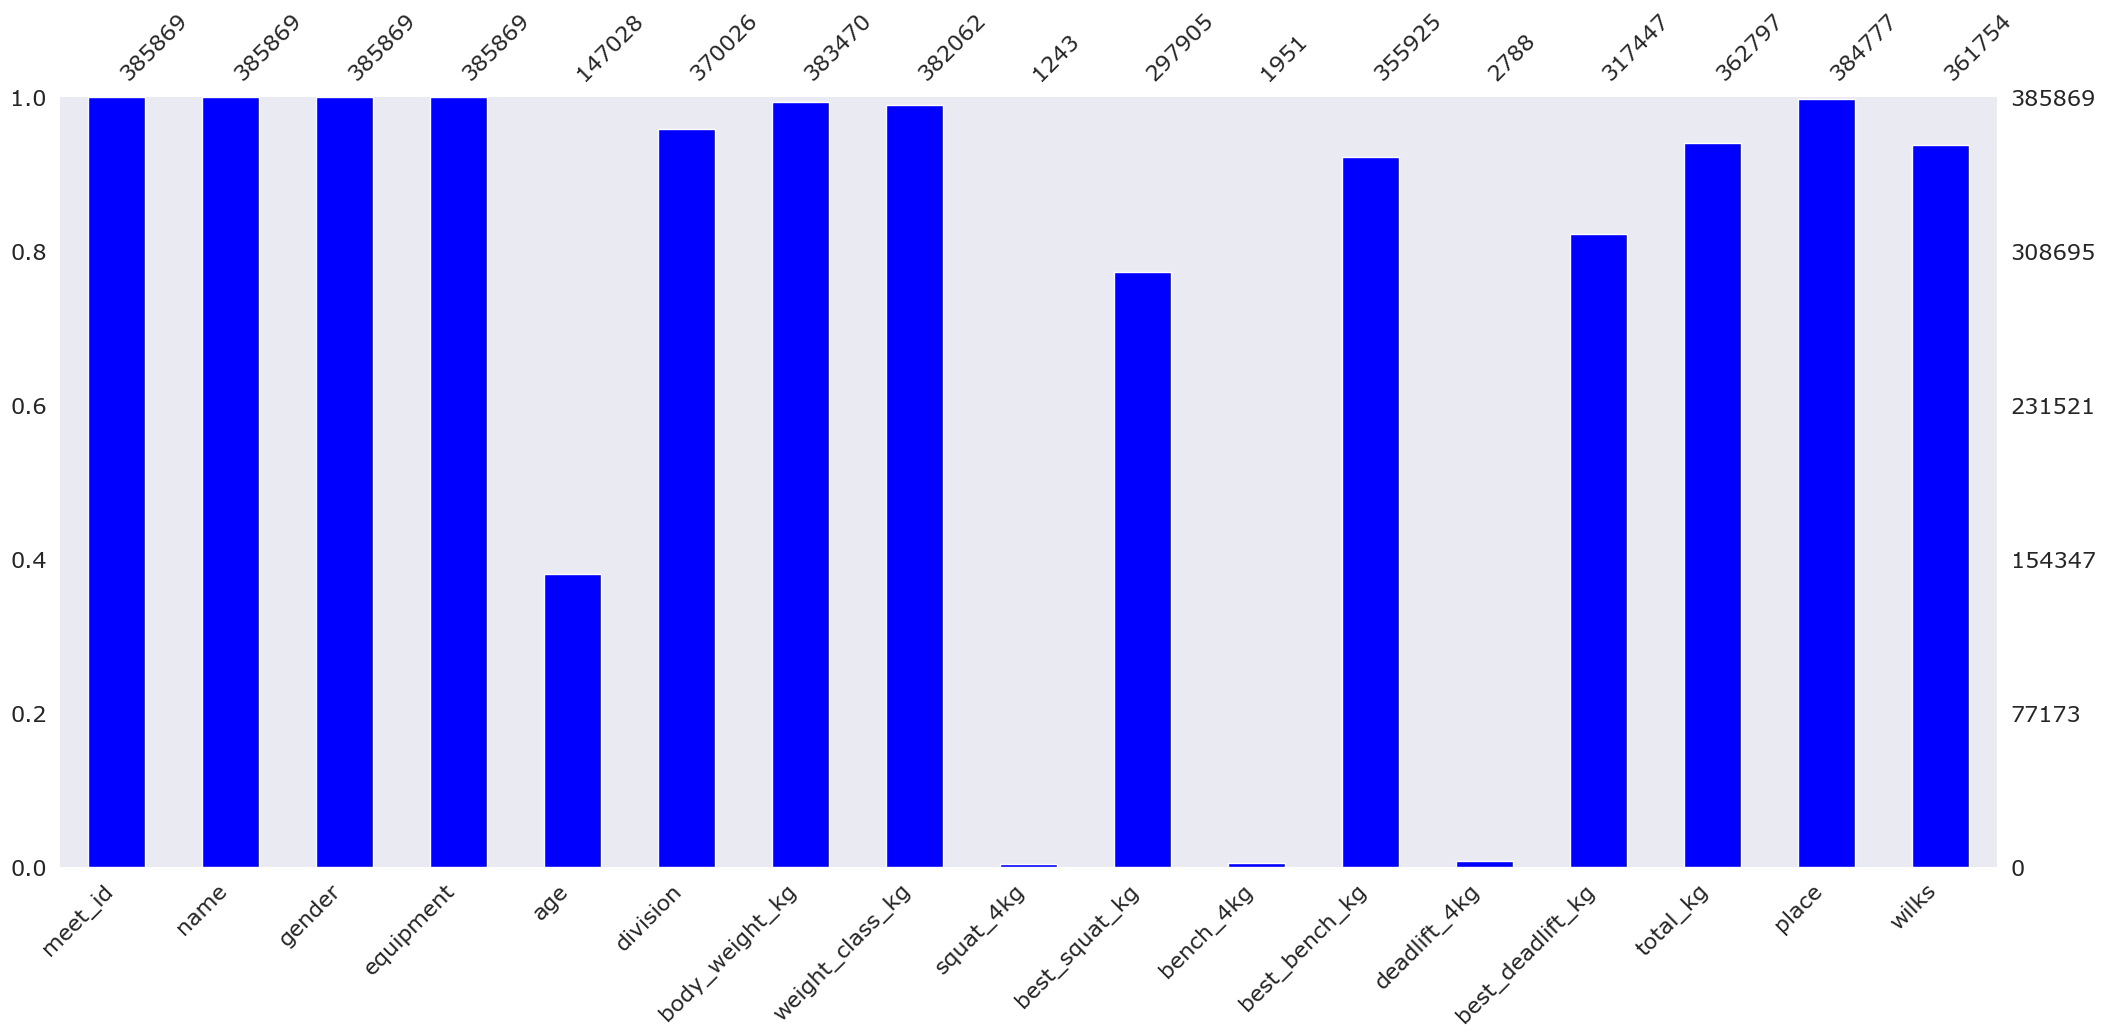

In [17]:
msno.bar(df, color="blue")
plt.show()

### **Observation** ###
- After observing the figure above we can see the columns `squat_4kg`, `bench_4kg` and `deadlift_4kg` have barely any values in them.
- Which means that most powerlifters don't powerlift `squating` or `bench bress` or `deadlift` for the `fourth time`.
- Which also means that most of them powerlift in three tries after resting in each attempt.

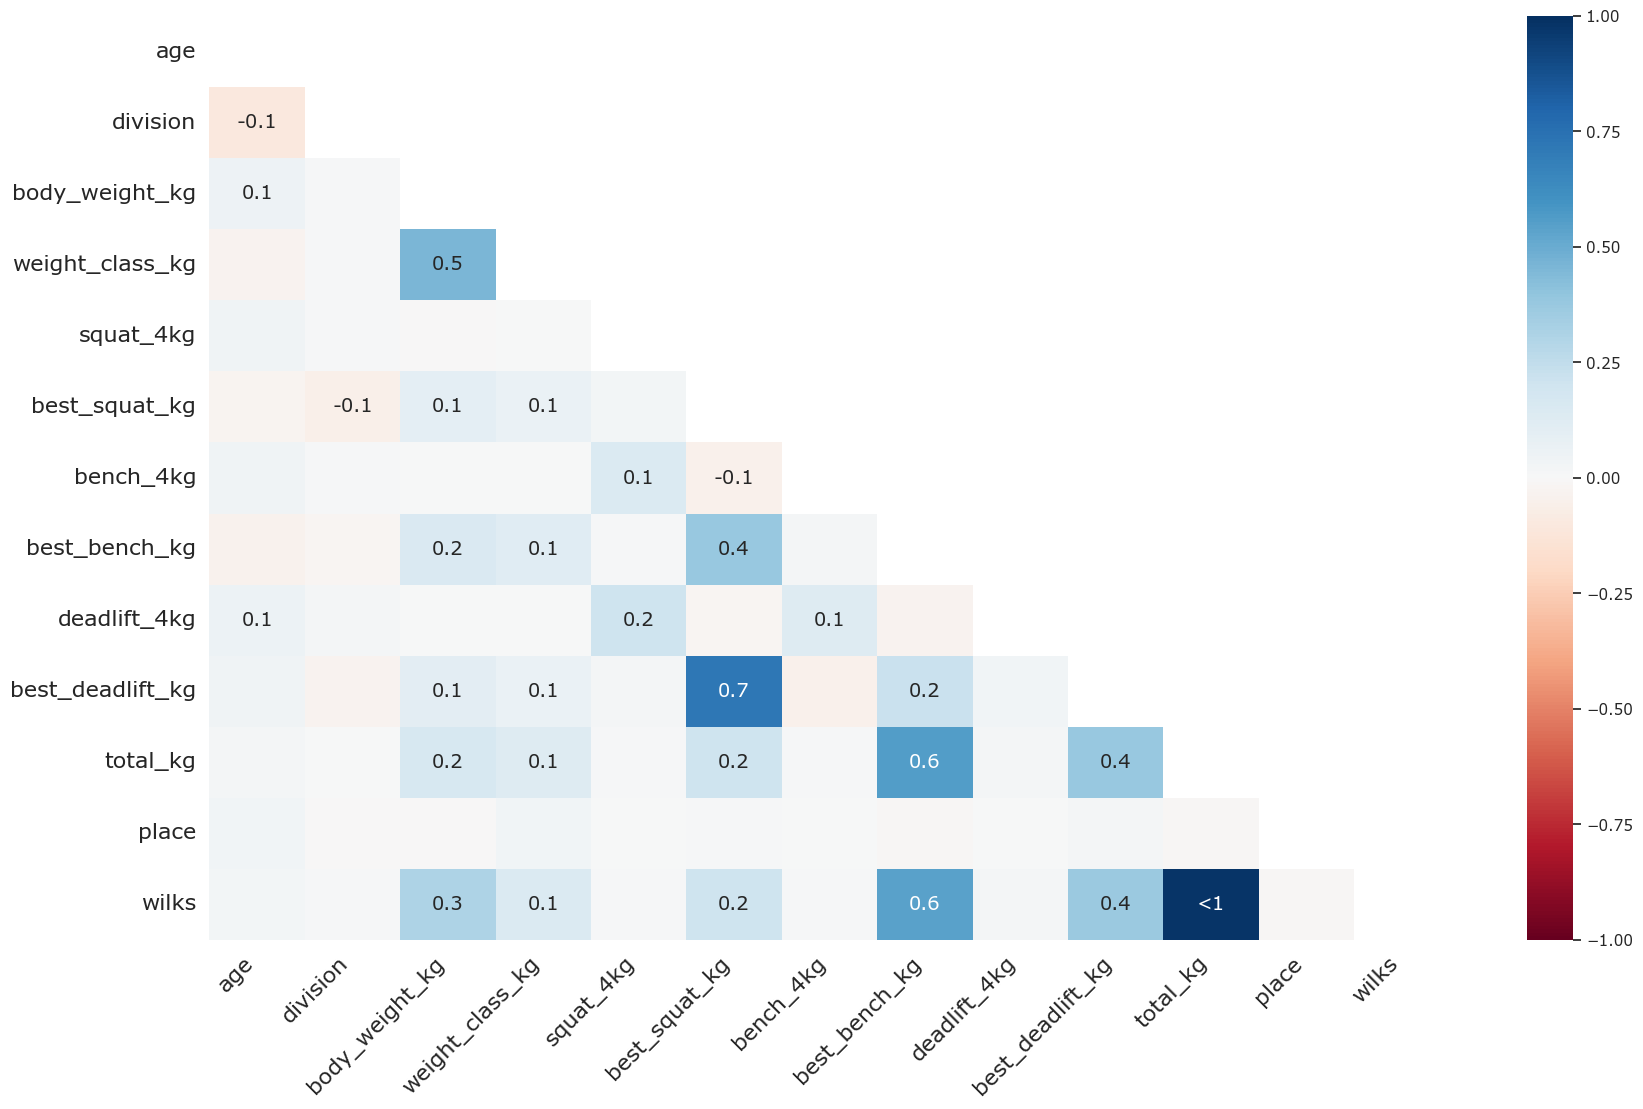

In [18]:
msno.heatmap(df)
plt.show()

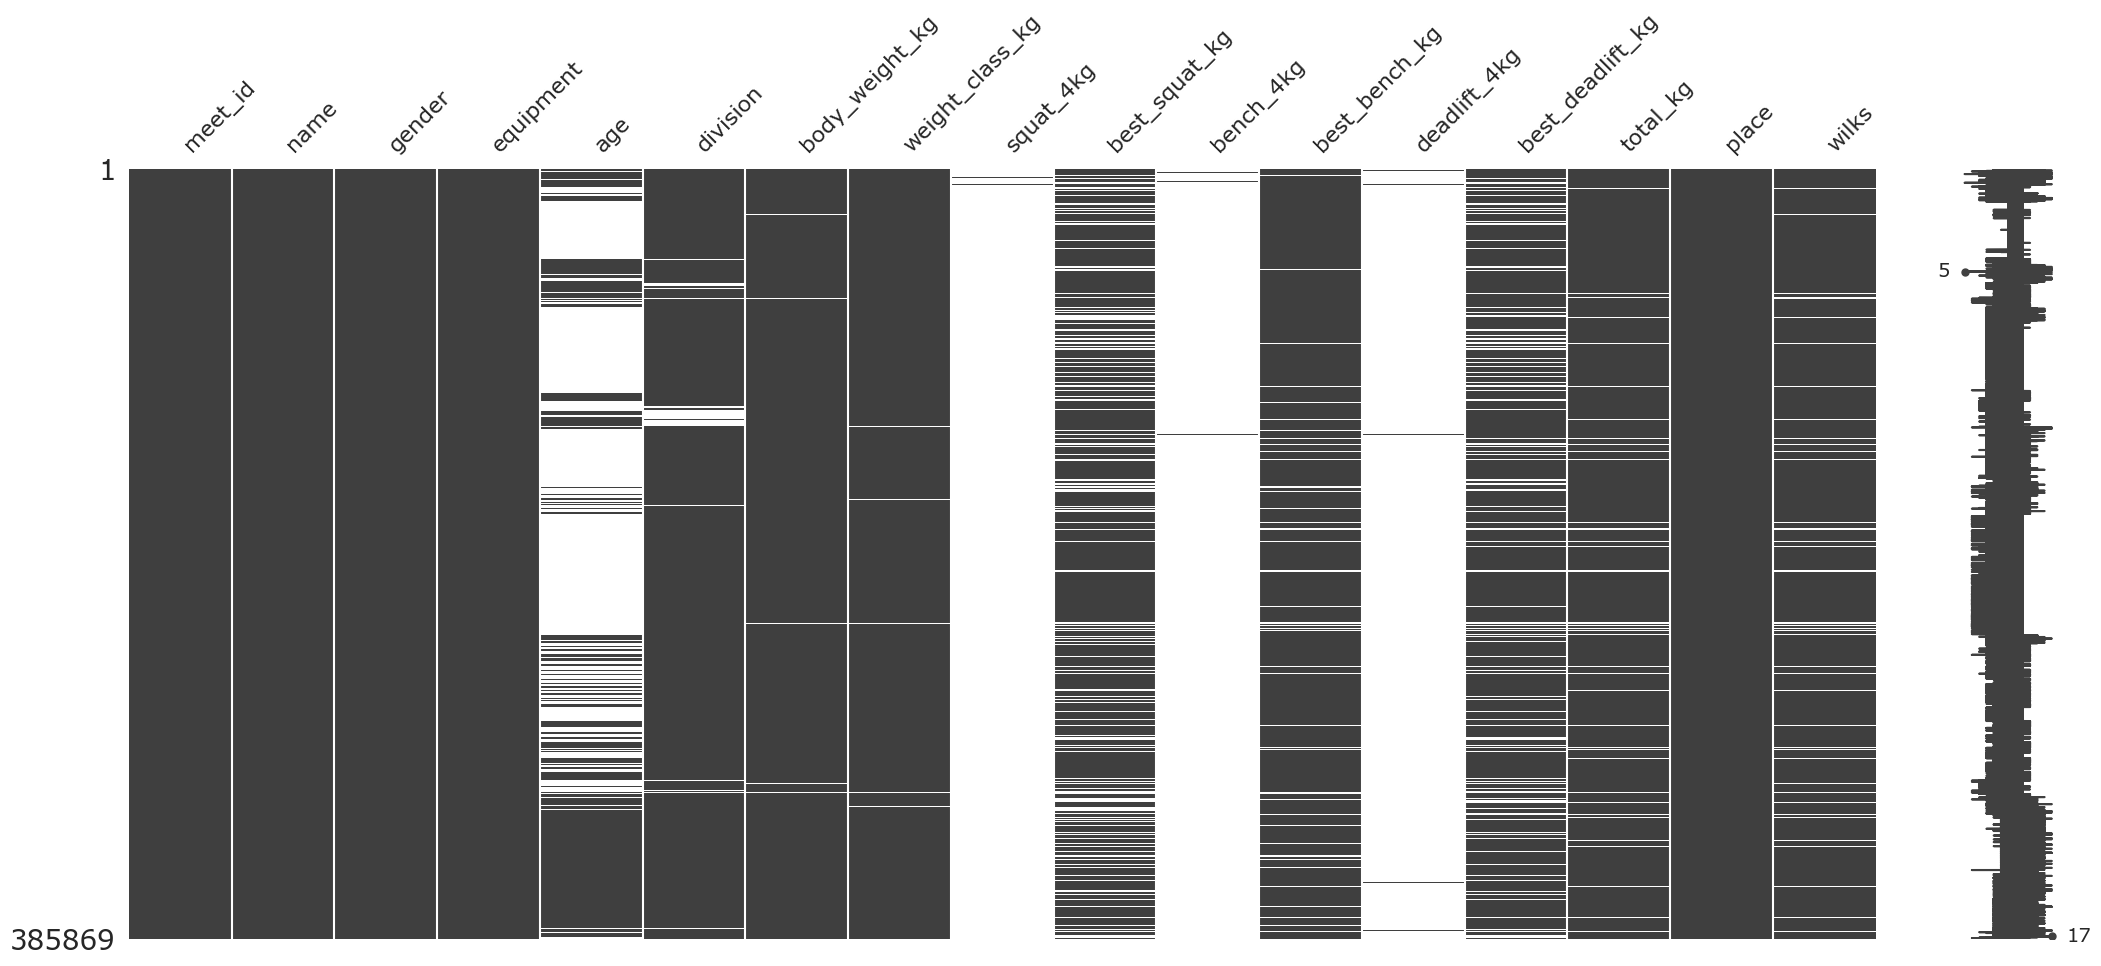

In [19]:
msno.matrix(df)
plt.show()

### **Observations** ###
1. We can see a strong relationship between `best_squat_kg` and `best_deadlift_kg` (0.7) ----> `MAR` in both columns.
2. A relationship between `best_bench_kg` and `wilks` || `best_bench_kg` and `total_kg` (0.6) ----> `MAR`.
3. Weak Relationship between `body_weight_kg` and `weight_class_kg` (0.5) ----> `MAR` but not 100%.
4. No relationship with `age` ----> `MCAR`
5. Strong relationship between `wilks` and `totla_kg` aproximatly [0.8: 1[ ----> `MAR`

### **Interpertation of the observations above**
1. squating and doing a deadlift are concentrating on the same muscles `lower back` and `legs` so, if the powerlifter fails at a deadlift he is most likely not going to be able to succeed in a squat hence not getting points in those sections and leaving them empty.
2. Most powerlifters or peaple that work out in their beginings focus on `bench press` a lot with a small effort in other muscles like `legs`. So, it makes sense if the powerlifter doesn't get any points due to him not succeeding in a `bench press` not a deadlift or a squat.
3. if the power lifter doesn't write his weight he is most likely not going specifiy his weight class but it's not 100% gauranteed.
4. `Age`'s missing values are not related to any feature
5. `Wilks` is a commen formula for determining the best powerlifter in a group as well as `total_kg` , but this is a different method for the same purpose. So, if it's empty that means the powerlifter failed and no points are caluclated in either method.

In [20]:
# Filling the NA values with "0" 
df.fillna({"best_squat_kg": 0, "best_deadlift_kg": 0, 
            "best_bench_kg": 0, "total_kg": 0, "wilks": 0}, inplace=True)

**Filling the NA values with a `0` because, the documentation of the data explains that an empty value in these columns relate to a `disqualification` of a powerlifter or an `unsuccessful lift`** 

In [21]:
missing=check_na(df)
missing

feature  missing#   missing%
4               age    238841  61.896913
5          division     15843   4.105798
6    body_weight_kg      2399   0.621714
7   weight_class_kg      3807   0.986604
8         squat_4kg    384626  99.677870
10        bench_4kg    383918  99.494388
12     deadlift_4kg    383081  99.277475
15            place      1092   0.282998

In [22]:
# See the describtion of all features with NA valuse of "division" to see if there is a relation
div_mis=df[df["division"].isna()]
div_mis.describe(include="all")

meet_id         name gender equipment          age division  \
count   15843.0        15843  15843     15843  9833.000000        0   
unique    523.0         8244      2         4          NaN        0   
top      7419.0  Max Bristow      M       Raw          NaN      NaN   
freq      188.0           33  11582      8779          NaN      NaN   
mean        NaN          NaN    NaN       NaN    30.013678      NaN   
std         NaN          NaN    NaN       NaN     9.726816      NaN   
min         NaN          NaN    NaN       NaN    13.500000      NaN   
25%         NaN          NaN    NaN       NaN    23.500000      NaN   
50%         NaN          NaN    NaN       NaN    27.500000      NaN   
75%         NaN          NaN    NaN       NaN    34.500000      NaN   
max         NaN          NaN    NaN       NaN    81.500000      NaN   

        body_weight_kg weight_class_kg   squat_4kg  best_squat_kg   bench_4kg  \
count     15658.000000           15598    5.000000   15843.000000    3.000000   
unique             NaN              40         NaN            NaN         NaN   
top                NaN              93         NaN            NaN         NaN   
freq               NaN            1539         NaN            NaN         NaN   
mean         85.186434             NaN  144.900000     180.957897  178.666667   
std          23.550559             NaN  233.788205      99.685674   60.063161   
min          39.300000             NaN -270.500000       0.000000  142.500000   
25%          67.500000             NaN  227.500000     120.000000  144.000000   
50%          82.170000             NaN  232.500000     182.500000  145.500000   
75%          99.650000             NaN  240.000000     240.000000  196.750000   
max         242.400000             NaN  295.000000     510.290000  248.000000   

        best_bench_kg  deadlift_4kg  best_deadlift_kg      total_kg  place  \
count    15843.000000       8.00000      15843.000000  15843.000000  15805   
unique            NaN           NaN               NaN           NaN     33   
top               NaN           NaN               NaN           NaN      1   
freq              NaN           NaN               NaN           NaN   4888   
mean       124.442943     110.50000        193.659215    486.181736    NaN   
std         64.028034     261.94615         93.372734    249.611100    NaN   
min          0.000000    -207.50000          0.000000      0.000000    NaN   
25%         77.500000    -180.62500        142.500000    317.500000    NaN   
50%        120.000000     222.50000        207.500000    502.500000    NaN   
75%        160.000000     297.00000        260.000000    647.500000    NaN   
max        412.770000     418.00000        410.000000   1230.000000    NaN   

               wilks  
count   15843.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean      347.869940  
std       154.795535  
min         0.000000  
25%       290.155000  
50%       366.220000  
75%       453.555000  
max       750.960000

In [23]:
# The opposite of the same condition above
no_div_mis=df[~df["division"].isna()]
no_div_mis.describe(include="all")

meet_id            name  gender equipment            age division  \
count   370026.0          370026  370026    370026  137195.000000   370026   
unique    8040.0          131635       2         5            NaN     4246   
top       7021.0  Sverre Paulsen       M       Raw            NaN     Open   
freq      1197.0             183  287040    177166            NaN    68532   
mean         NaN             NaN     NaN       NaN      31.783666      NaN   
std          NaN             NaN     NaN       NaN      13.088107      NaN   
min          NaN             NaN     NaN       NaN       5.000000      NaN   
25%          NaN             NaN     NaN       NaN      22.000000      NaN   
50%          NaN             NaN     NaN       NaN      28.000000      NaN   
75%          NaN             NaN     NaN       NaN      39.500000      NaN   
max          NaN             NaN     NaN       NaN      95.000000      NaN   

        body_weight_kg weight_class_kg    squat_4kg  best_squat_kg  \
count    367812.000000          366464  1238.000000  370026.000000   
unique             NaN              49          NaN            NaN   
top                NaN              90          NaN            NaN   
freq               NaN           35346          NaN            NaN   
mean         87.002999             NaN   106.883481     134.392736   
std          23.117499             NaN   166.767293      95.186869   
min          15.880000             NaN  -440.500000    -477.500000   
25%          70.400000             NaN    87.500000      67.500000   
50%          83.470000             NaN   145.000000     145.150000   
75%         100.000000             NaN   210.920000     202.500000   
max         240.000000             NaN   450.000000     573.790000   

          bench_4kg  best_bench_kg  deadlift_4kg  best_deadlift_kg  \
count   1948.000000  370026.000000   2780.000000     370026.000000   
unique          NaN            NaN           NaN               NaN   
top             NaN            NaN           NaN               NaN   
freq            NaN            NaN           NaN               NaN   
mean      45.457823     108.498902    113.498072        159.032750   
std      151.910776      61.258239    170.226077         92.823499   
min     -360.000000    -522.500000   -461.000000       -410.000000   
25%      -90.000000      67.500000    110.000000        115.000000   
50%       90.000000     110.000000    157.500000        175.000000   
75%      167.500000     147.420000    219.990000        227.500000   
max      378.750000     488.500000    400.000000        460.400000   

             total_kg   place          wilks  
count   370026.000000  368972  370026.000000  
unique            NaN      81            NaN  
top               NaN       1            NaN  
freq              NaN  189441            NaN  
mean       394.959666     NaN     279.508245  
std        212.886785     NaN     132.490513  
min          0.000000     NaN       0.000000  
25%        237.500000     NaN     193.465000  
50%        400.000000     NaN     309.410000  
75%        552.500000     NaN     372.390000  
max       1365.310000     NaN     779.380000

**There might be a relation between `"division"`'s NA values and [`"wilks"` or `"total_kg"`] Na values but Couldn't find it or it doesn't exist**

In [24]:
df.drop(labels=["deadlift_4kg", "bench_4kg", "deadlift_4kg", "age", "squat_4kg"], axis=1, inplace=True)

**Dropping these `columns` because the `NA values` are way `too high` more than `50%`**

In [25]:
missing=check_na(df)
missing

feature  missing#  missing%
4          division     15843  4.105798
5    body_weight_kg      2399  0.621714
6   weight_class_kg      3807  0.986604
11            place      1092  0.282998

In [26]:
df.fillna({"division": df["division"].mode()[0]}, inplace=True)

**Filling the `division` column with `mode` since it's a `categorical` feature and it makes sense because it's a division**

In [27]:
missing=check_na(df)
missing

feature  missing#  missing%
5    body_weight_kg      2399  0.621714
6   weight_class_kg      3807  0.986604
11            place      1092  0.282998

**Dripping the `rows` that have NA values because their `percentages` are so `low`**

In [28]:
# Dropping the rest of the NA values because their percentages are low
df.dropna(inplace=True)

In [29]:
# To fix the holes of the indices that was created because of the dropping process
df.reset_index(drop=True, inplace=True)

In [30]:
missing=check_na(df)
missing

Empty DataFrame
Columns: [feature, missing#, missing%]
Index: []

---
# <center>Outliers<center>
---

In [31]:
df.columns

Index(['meet_id', 'name', 'gender', 'equipment', 'division', 'body_weight_kg',
       'weight_class_kg', 'best_squat_kg', 'best_bench_kg', 'best_deadlift_kg',
       'total_kg', 'place', 'wilks'],
      dtype='object')

In [32]:
# Categorical Featuares that we can viusailize
cate_col=["gender", "equipment"]
# Numerical Features
numer_col=["body_weight_kg", "best_squat_kg", "best_bench_kg", "best_deadlift_kg", "total_kg", "wilks"]

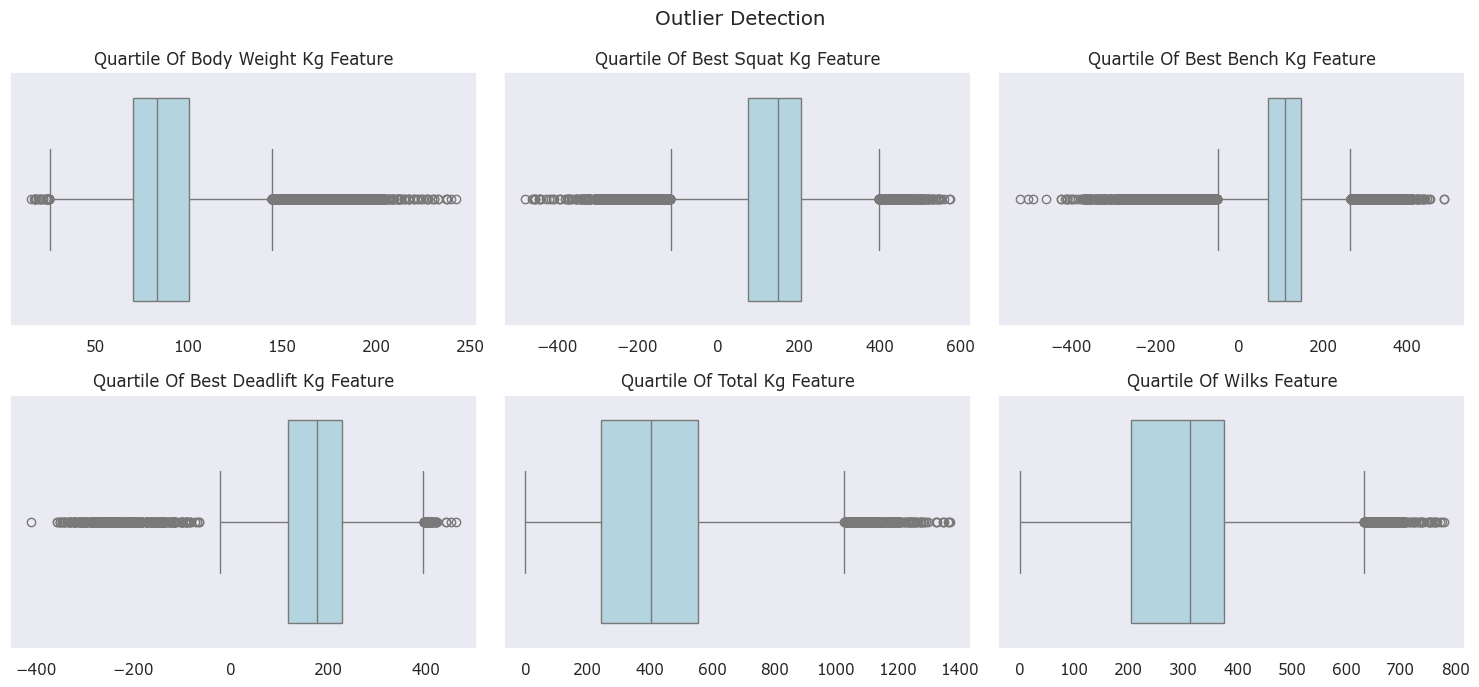

In [33]:
from utils import boxplot_check
boxplot_check(df, numer_col, color="lightblue", figsize=(15, 7))

### **Interpertation of the observations**
- All the features have extreme values but we are not going to categorize them as outlieres. Why? ----> because this is a data about `powerlifting` and `weights` so we need these values and study them not remove them.
- Some features have `-ve values` like these features [`best_squat_kg`, `best_bench_kg`, `best_deadlift_kg`]. Why? ----> becasue according to the documentation of the data: it's sometimes negative due to some `federations` where they report the `lowest weight` the lifter attempted and failed.

**Removing `-ve outliers` from these features [`best_squat_kg`, `best_bench_kg`, `best_deadlift_kg`], because it's already determined that the lifter failed to lift the lowst weight!**

**1. `best_squat_kg` Feature**

In [34]:
Q1_squat= df["best_squat_kg"].quantile(0.25)
Q3_squat= df["best_squat_kg"].quantile(0.75)
IQR_squat= Q3_squat - Q1_squat
# Removing the -ve outliers only
df=df[df["best_squat_kg"]>=Q1_squat - 1.5*IQR_squat]

**2. `best_deadlift_kg` Feature**

In [35]:
Q1_deadlift= df["best_deadlift_kg"].quantile(0.25)
Q3_deadlift= df["best_deadlift_kg"].quantile(0.75)
IQR_deadlift= Q3_deadlift - Q1_deadlift
# Removing the -ve outliers only
df= df[df["best_deadlift_kg"]>=Q1_deadlift - 1.5*IQR_deadlift]

**3. `best_bench_kg` Feature**

In [36]:
Q1_bench= df["best_bench_kg"].quantile(0.25)
Q3_bench= df["best_bench_kg"].quantile(0.75)
IQR_bench= Q3_bench - Q1_bench
# Removing the -ve outliers only
df= df[df["best_bench_kg"]>=Q1_bench - 1.5*IQR_bench]

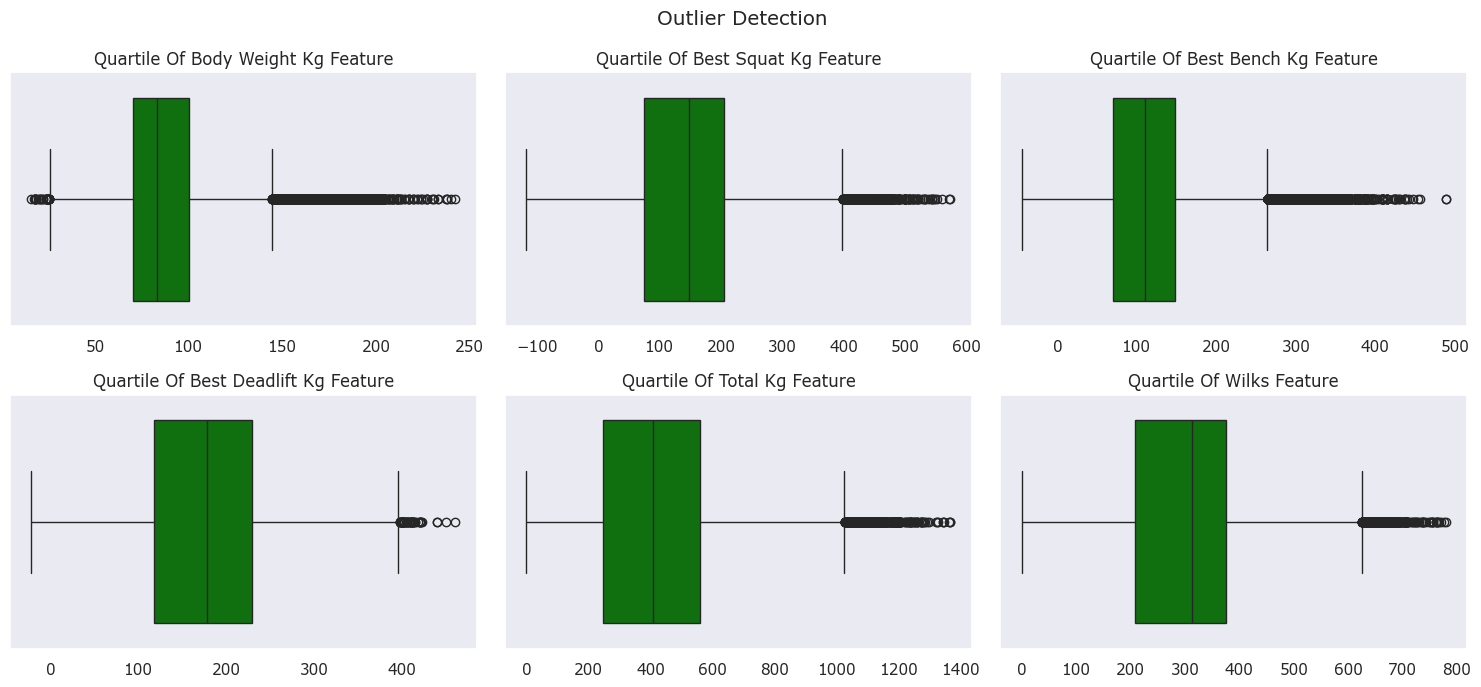

In [37]:
boxplot_check(df, numer_col, color="green", figsize=(15, 7))

---
# <center>Exploratory Data Analysis<center>
---

## **Univariate Visualizations**

**1. Distribution of Categorical Features**

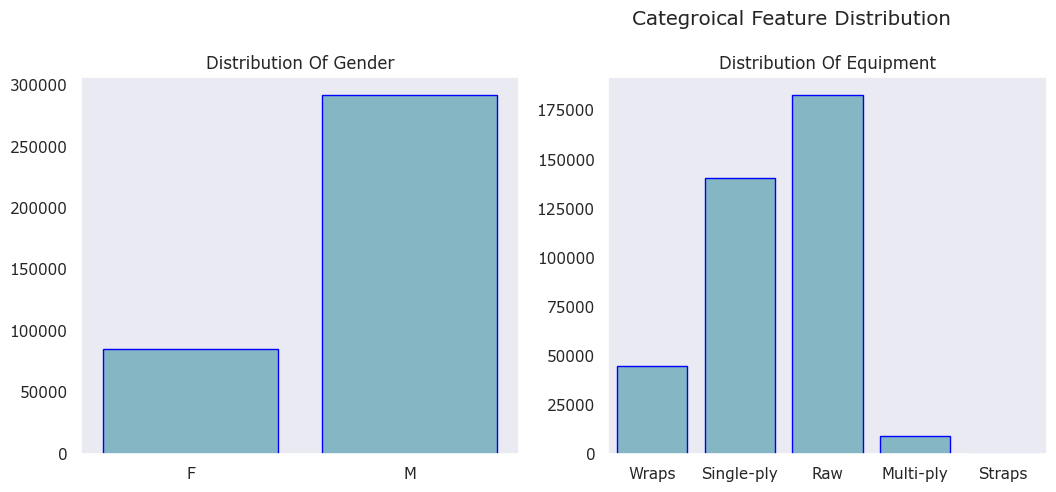

In [38]:
from utils import categorical_visualization
categorical_visualization(df, cate_col, figsize=(16, 5))

**`Observations`**
- **Most of the powerlifters are `males`**
- **Most powerlifters don't use equipment and powerlift weights `raw`**

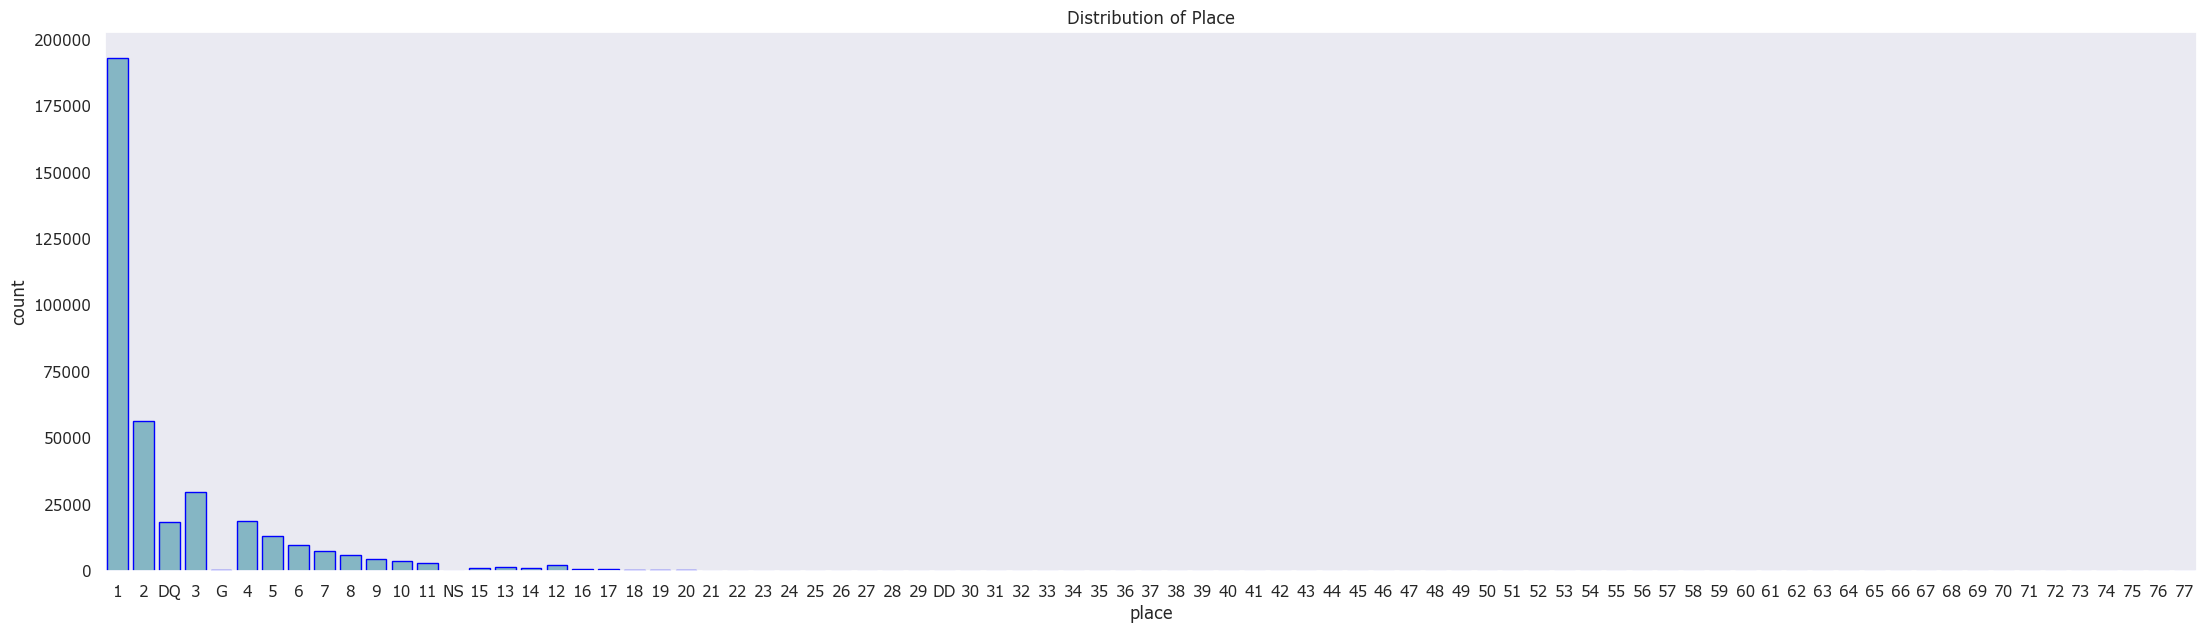

In [39]:
# Plotting this feature alone because the categories' number is high (81)
plt.figure(figsize=(27,7))
sns.countplot(data=df, x="place", edgecolor="blue")
plt.title("Distribution of Place")
plt.show()

- **Most of the powerlifters get placed in first**

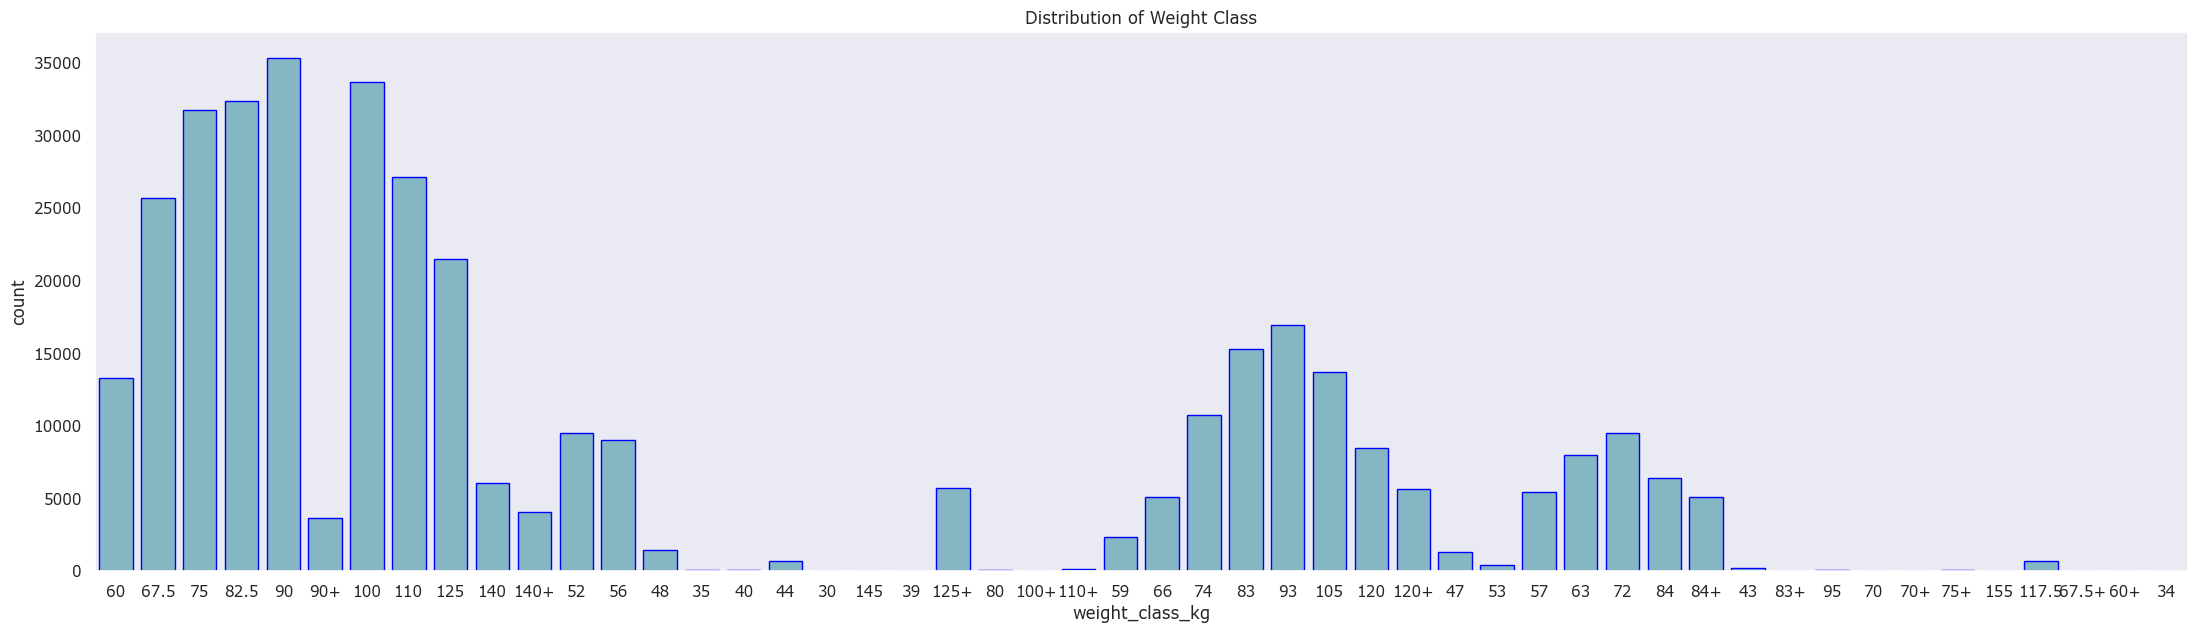

In [40]:
# Plotting this feature alone as well because the categories' number is high (50)
plt.figure(figsize=(27, 7))
sns.countplot(data=df, x="weight_class_kg", edgecolor="blue")
plt.title("Distribution of Weight Class")
plt.show()

- **We can see the weight class of the powerlifters varies across different categories but most of them are concentrated in these sets `[60 : 56]` and `[59 : 84+]`**
- **Most of them have weight class of `90` with over `3500` counts**

**2. Distribution of Numerical Features**

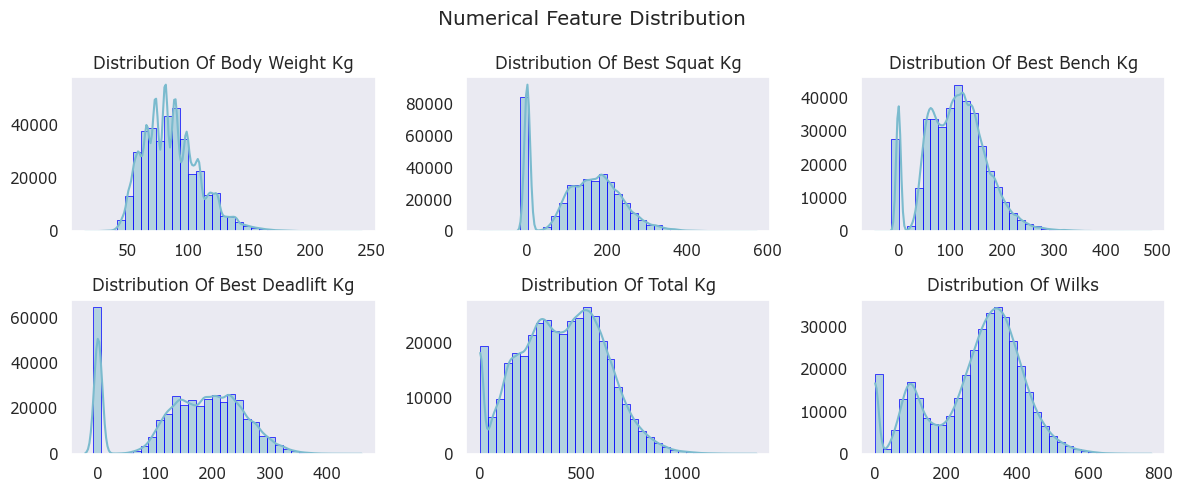

In [41]:
from utils import numerical_visualization
numerical_visualization(df, numer_col, bins=35, kde=True)

- **We can see that most of the numercial distributions are `normal` or `semi-normal`**
- **Some of them are right skewed like `Body Weight Kg`, `Total Kg`**
- **A lot of the records are `concentrated` at `0` why? ----> because when filling `NA values` we had to fill it with a `0`**

## **Bivariate Visualization**

**1. [Total Kg, Wilks] and Gender**

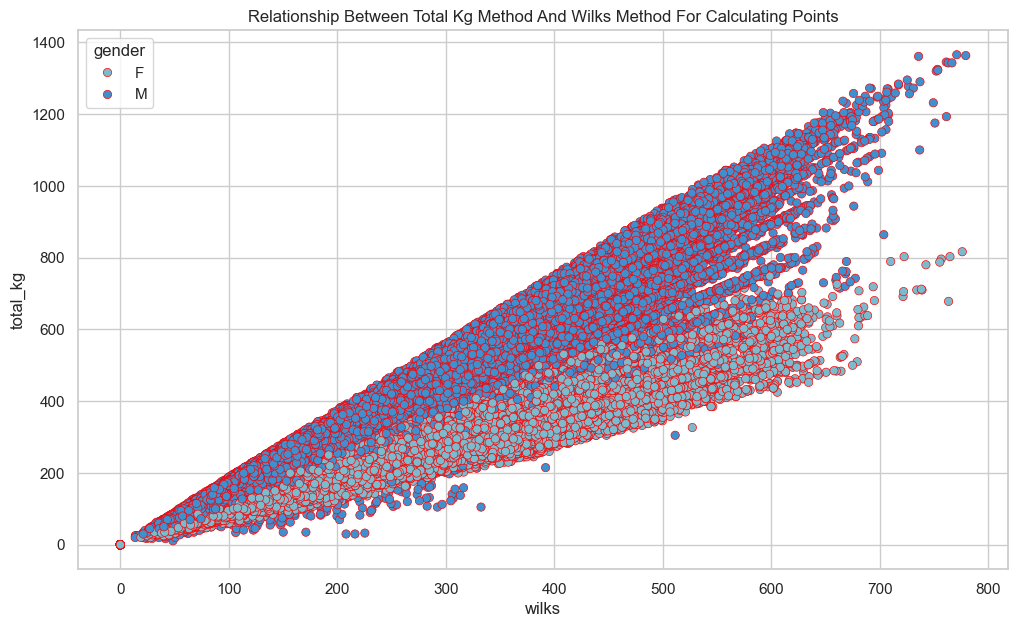

In [42]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df, x="wilks", y="total_kg", hue="gender", edgecolor="red")
    plt.title("Relationship between Total Kg method and Wilks method for calculating points".title())
plt.show()

- **`Positive relation` between the two columns since they are both methods to calculate points for the powerlifter**
- **Males score `higher` points than females**

**2. [Best Deadlift, Best Bench Press, Best Squat] and Equipment used** 

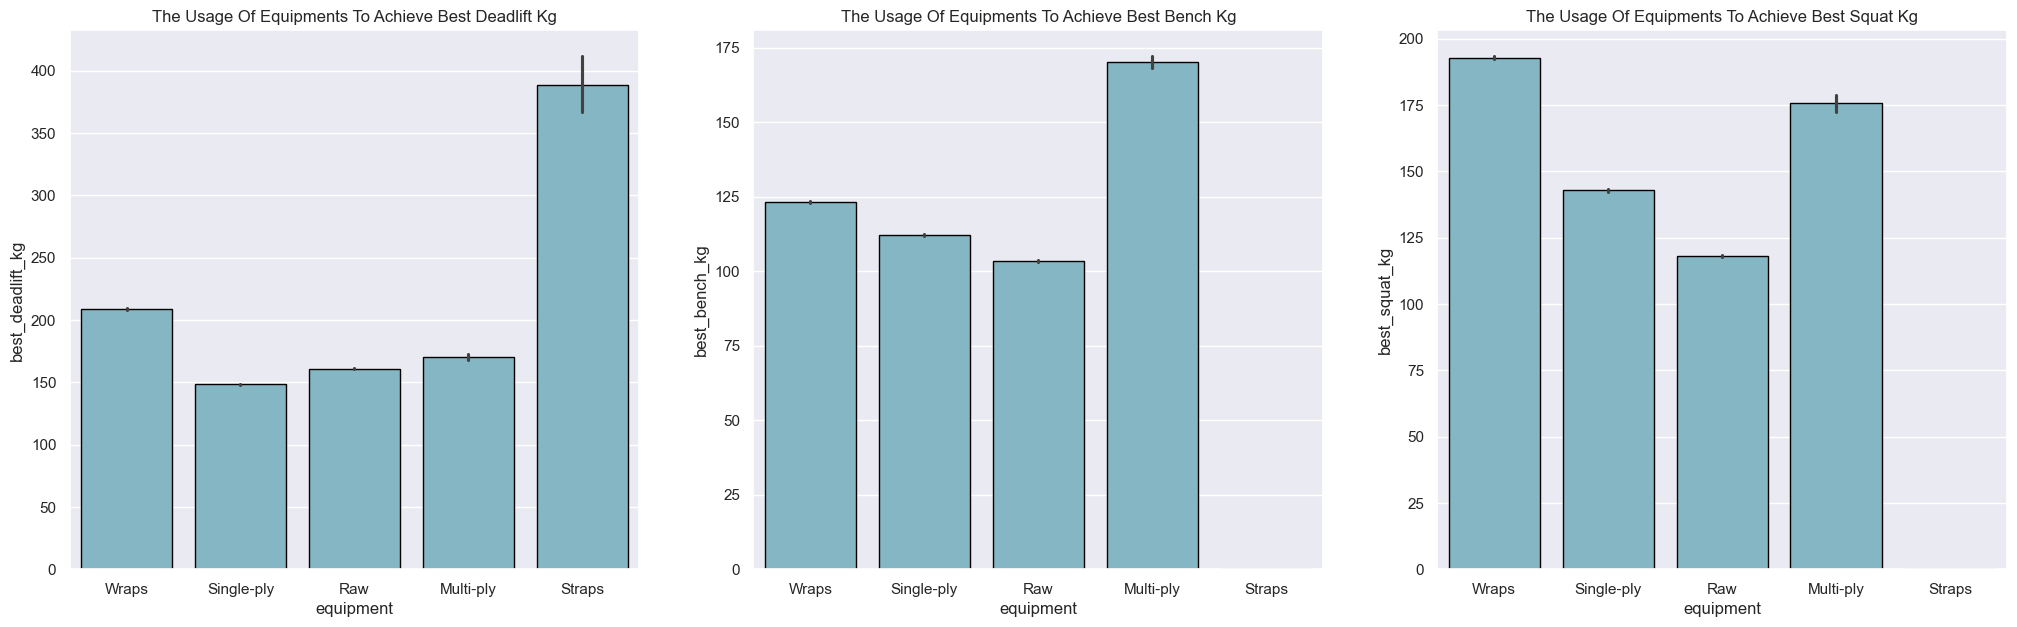

In [43]:
temp_col=["best_deadlift_kg", "best_bench_kg", "best_squat_kg"]
plt.figure(figsize=(25, 7))
with sns.axes_style("darkgrid"):    
    for i, col in enumerate(temp_col):   
        plt.subplot(1, 3, i+1)
        sns.barplot(data=df, x="equipment", y=col, edgecolor="black")
        plt.title(f"The usage of equipments to achieve {col}".replace("_", " ").title())
plt.show()

- **In the `first barplot` we can see that powerlifters who achieved approximatly 400 Kg in deadlift used `Straps` to help them with the grip of the bar**
- **In the `second barplot` we can see that powerlifters who achieved approximatly 175 Kg in bench press used `Multi-ply` to help them with lowering and raising the bar**
- **In the `third barplot` we can see that powerlifters who achieved approximatly 190 Kg in squat used `Wraps` to help their back**

**3. [Best Bench Press, Best Deadlift, Best Squat, Equipment] and Total Kg**

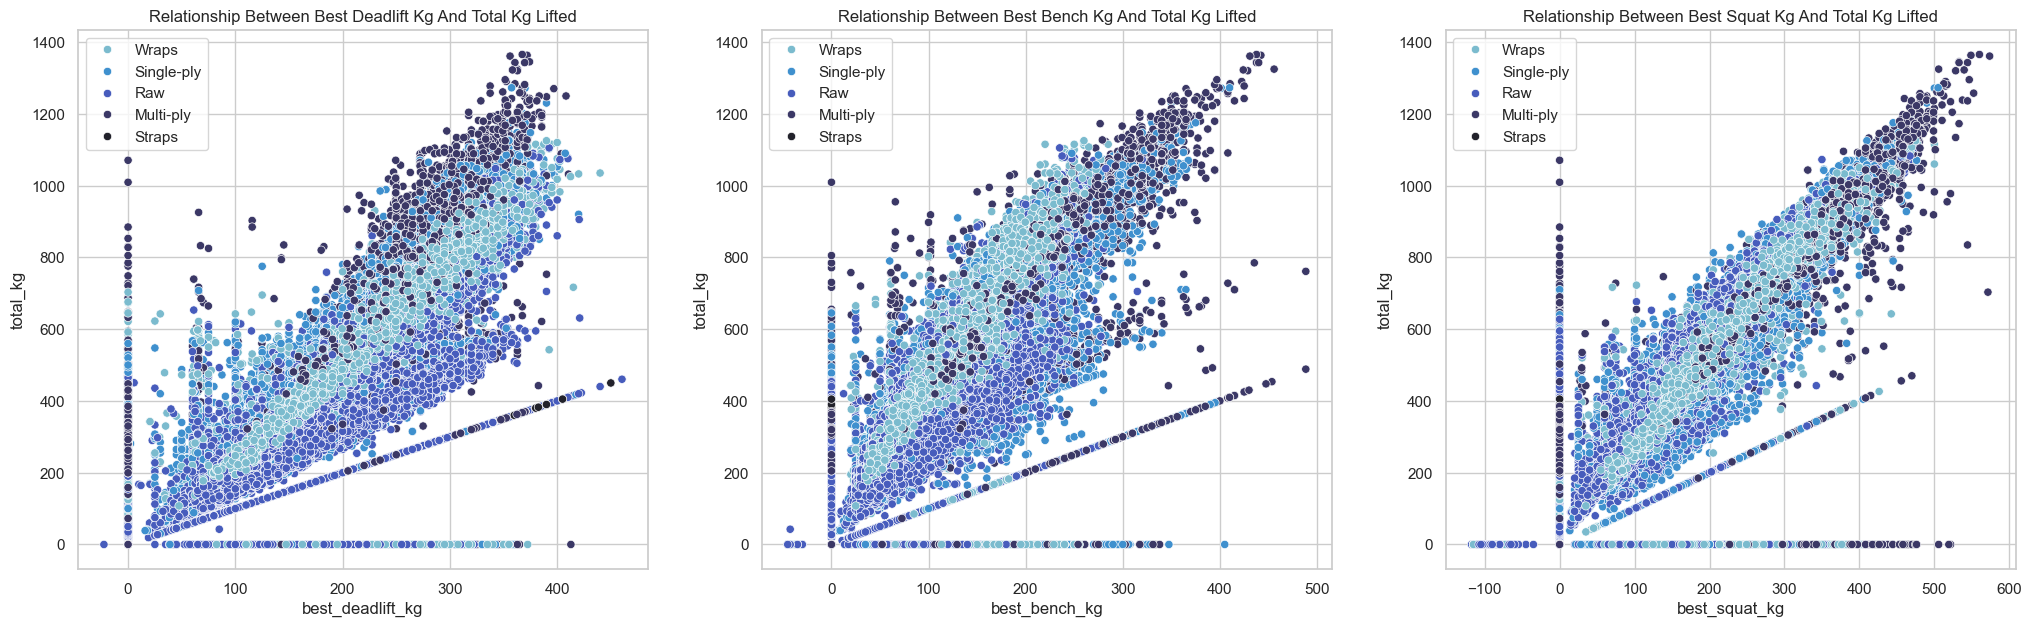

In [44]:
plt.figure(figsize=(25, 7))
with sns.axes_style("whitegrid"):    
    for i, col in enumerate(temp_col):   
        plt.subplot(1, 3, i+1)
        sns.scatterplot(data=df, x=col, y="total_kg", hue= "equipment")
        plt.title(f"Relationship between {col} and total Kg lifted".replace("_", " ").title())
        plt.legend(loc="upper left")
plt.show()

- **Positive relationships, where total kg increses based on either `best bench press` or `best squat` or `best deadlift`**
- **Equipment usage `varies` in all the plots**

**4. Gender and Body Weight** 

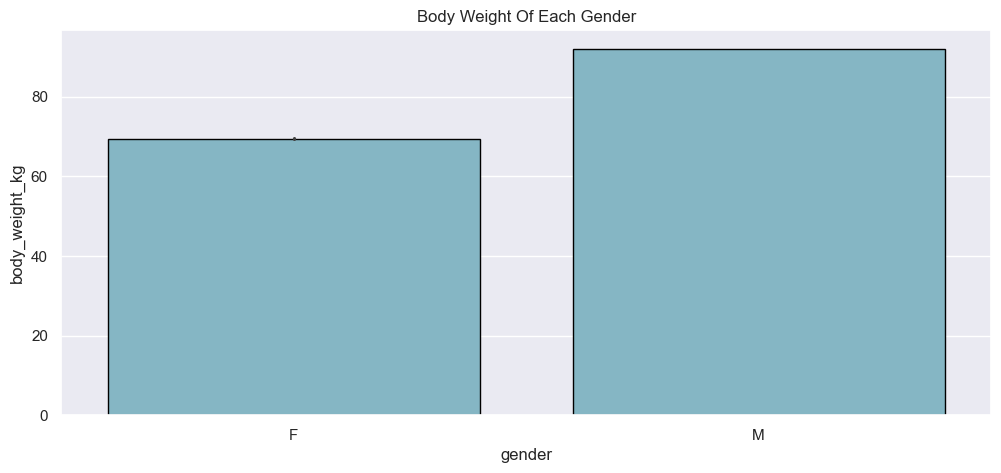

In [45]:
with sns.axes_style("darkgrid"):       
    plt.figure(figsize=(12, 5))
    sns.barplot(data=df, x="gender", y="body_weight_kg", edgecolor="black")
    plt.title("Body Weight of each gender".title())
plt.show()

- **Females have body weight `less` than Males in Kg**
- **Males' body weight exceeds `80 Kg`**

**5. Weight Class Kg and Wilks**

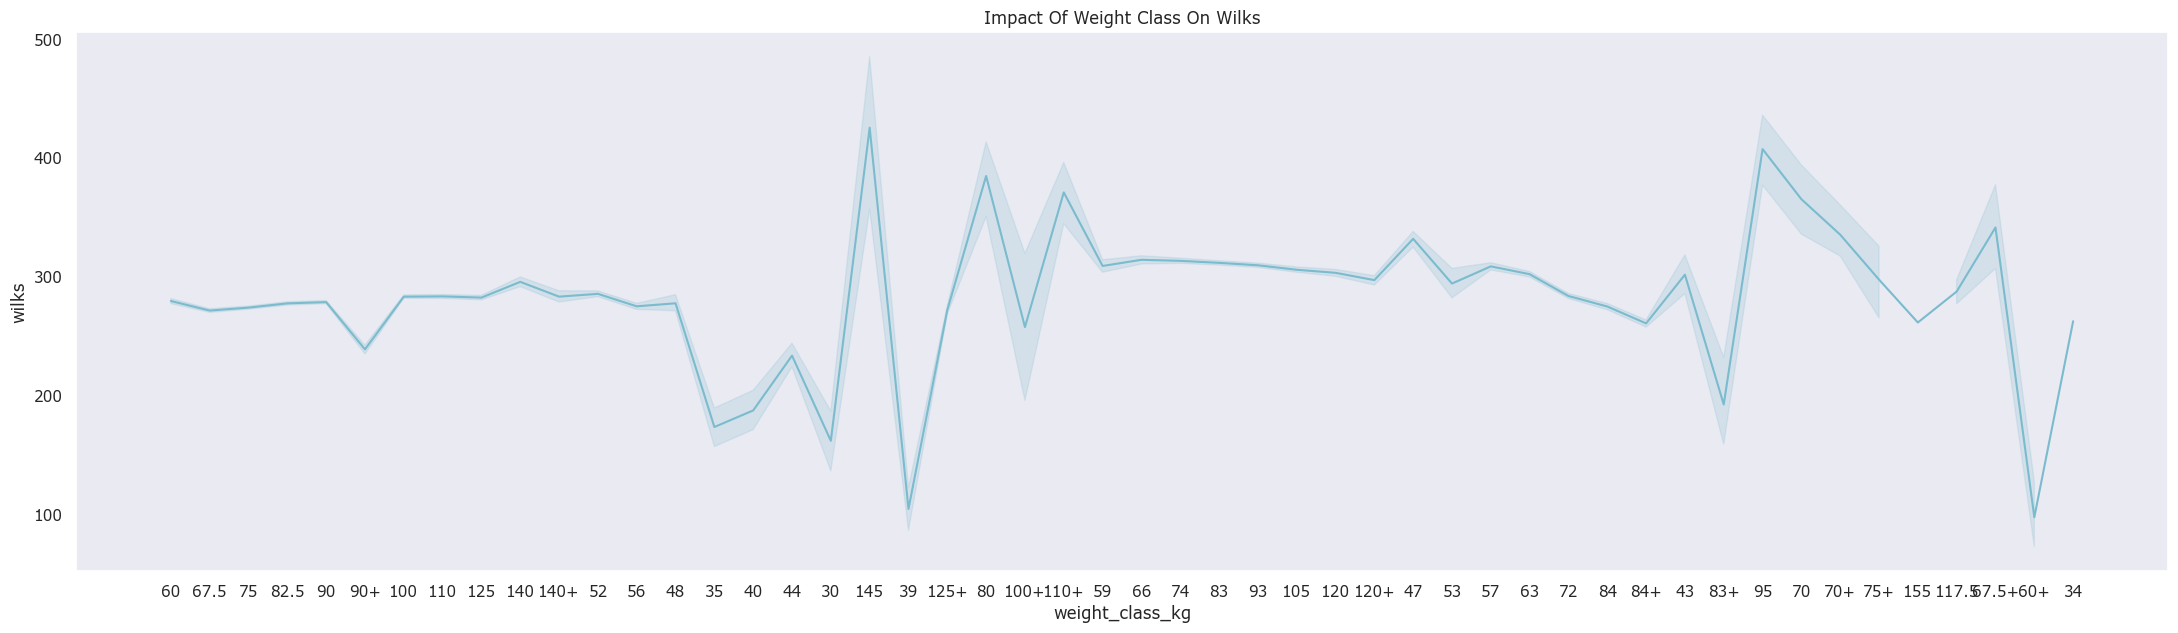

In [46]:
plt.figure(figsize=(27, 7))
sns.lineplot(data=df, x="weight_class_kg", y="wilks", dashes=True)
plt.title("Impact of weight class on wilks".title())
plt.show()

- **Trying to see if there is an impact on `wilks` based on `weight class kg`** 
- **And we can see that weight class `145` has high wilks as well as `70`, so there might be a connection**

**6. Body Weight and Place** 

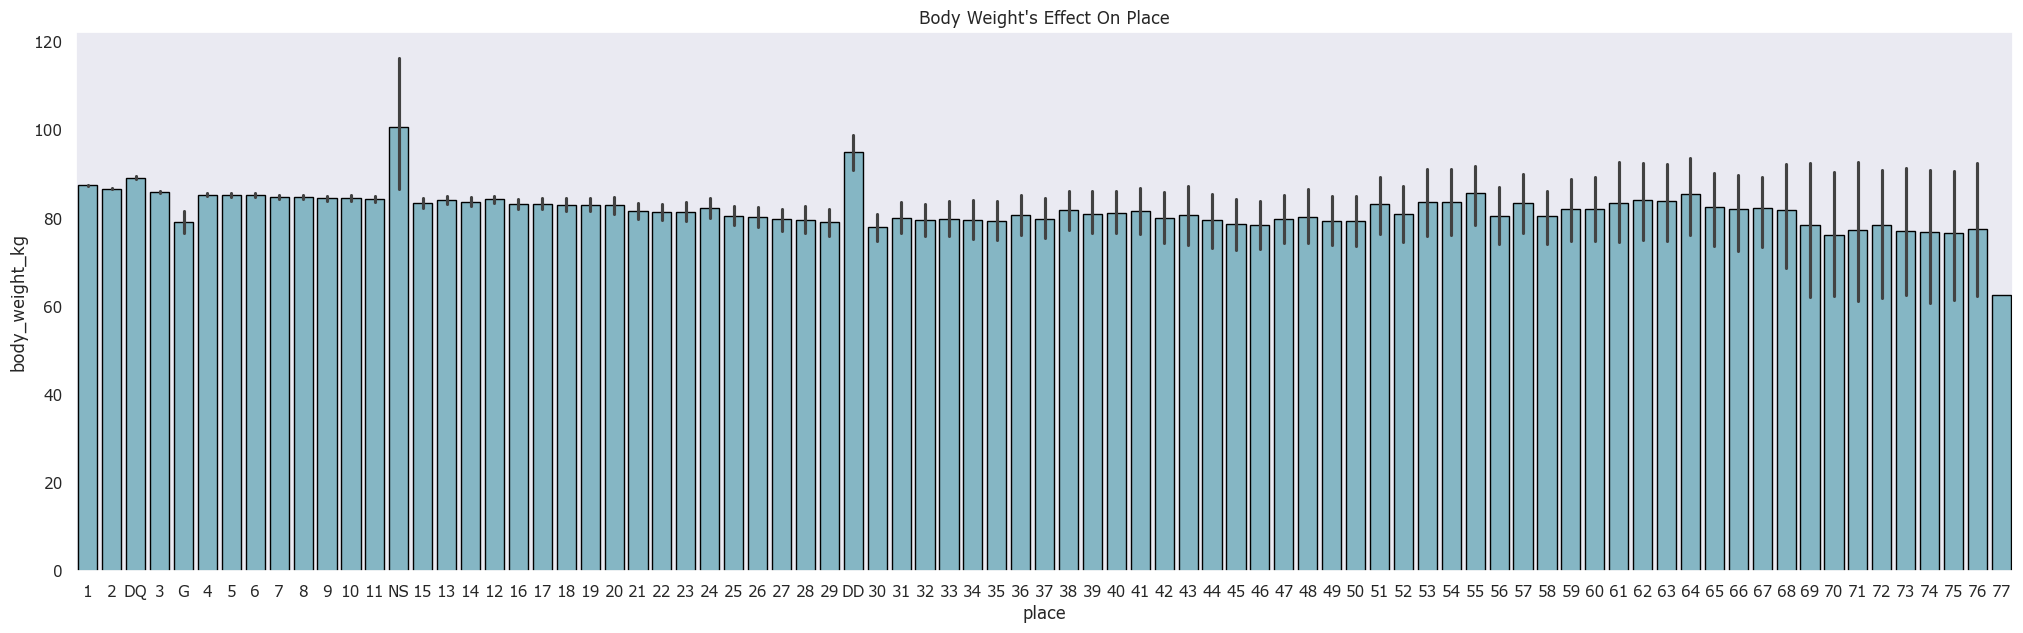

In [47]:
plt.figure(figsize=(25, 7))
sns.barplot(data=df, x="place", y="body_weight_kg", edgecolor="black")
plt.title("Body Weight's Effect On Place")
plt.show()

- **We can see here that weight has `no effect` on which place the powerlifter came in, cause all of them have almost the same value**
- **We can see that the people who didn't show up have weight of `100 kg` or higher**

**7. [Equipment, Gender] and Wilks**

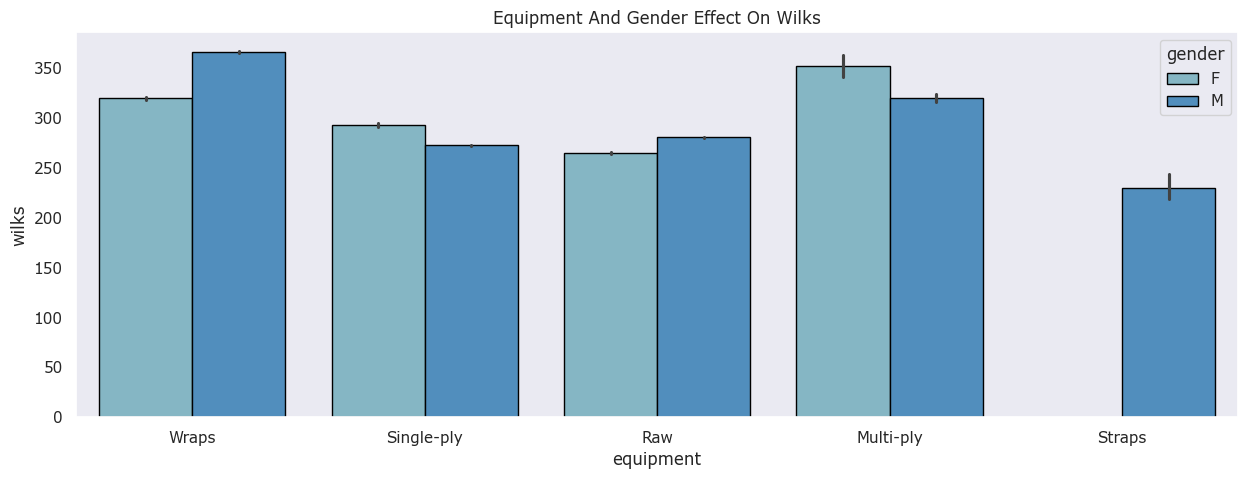

In [48]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="equipment", y="wilks", hue="gender", edgecolor="black")
plt.title("Equipment And Gender Effect On Wilks")
plt.show()

- **We can see that most `males` who achieved high wilks used `Wraps`**
- **We can also see that most `females` who achieved high wilks used `Multi-ply`**

## **Summary of Analysis**

#### **Demographics & Participation:**
- Majority of powerlifters are **male**  
- Most compete **raw (without equipment)**  
- Most lifters tend to place **first** in competitions  

#### **Weight Class Insights:**
- Weight classes vary but are mostly concentrated around **56–60 kg** and **59–84+ kg**  
- The most common weight class is **90 kg**, with over **3500 lifters**  
- **Males generally weigh more**, often exceeding **80 kg**, while **females weigh less** on average  

#### **Performance & Distributions:**
- Many numerical features follow a **normal or semi-normal distribution**  
- Some variables (e.g., **Body Weight Kg, Total Kg**) are **right-skewed**  
- Zeros in the dataset are due to **filling missing values (NA)** with `0` 

#### **Relationships & Trends:**
- Strong **positive relationships** between **Total Kg** and each of the best lifts (squat, bench, deadlift)  
- **Wilks scores**:  
  - Higher for **males** compared to females  
  - Particularly high in **weight classes 70 and 145 kg**, suggesting a potential link  
- **Weight class does not affect placement** --> all classes show similar placement distributions  
- Lifters who **did not show up** often had weights of **100+ kg**  

#### **Equipment Usage & Lift Records:**
- **Deadlift (~400 kg)** --> lifters often used **Straps**  
- **Bench Press (~175 kg)** --> lifters often used **Multi-ply suits**  
- **Squat (~190 kg)** --> lifters often used **Wraps**  
- Among high Wilks scorers:  
  - **Males** often used **Wraps**  
  - **Females** often used **Multi-ply**  

---
# <center>Correlation Analysis<center>
---

**1. Pairwise**

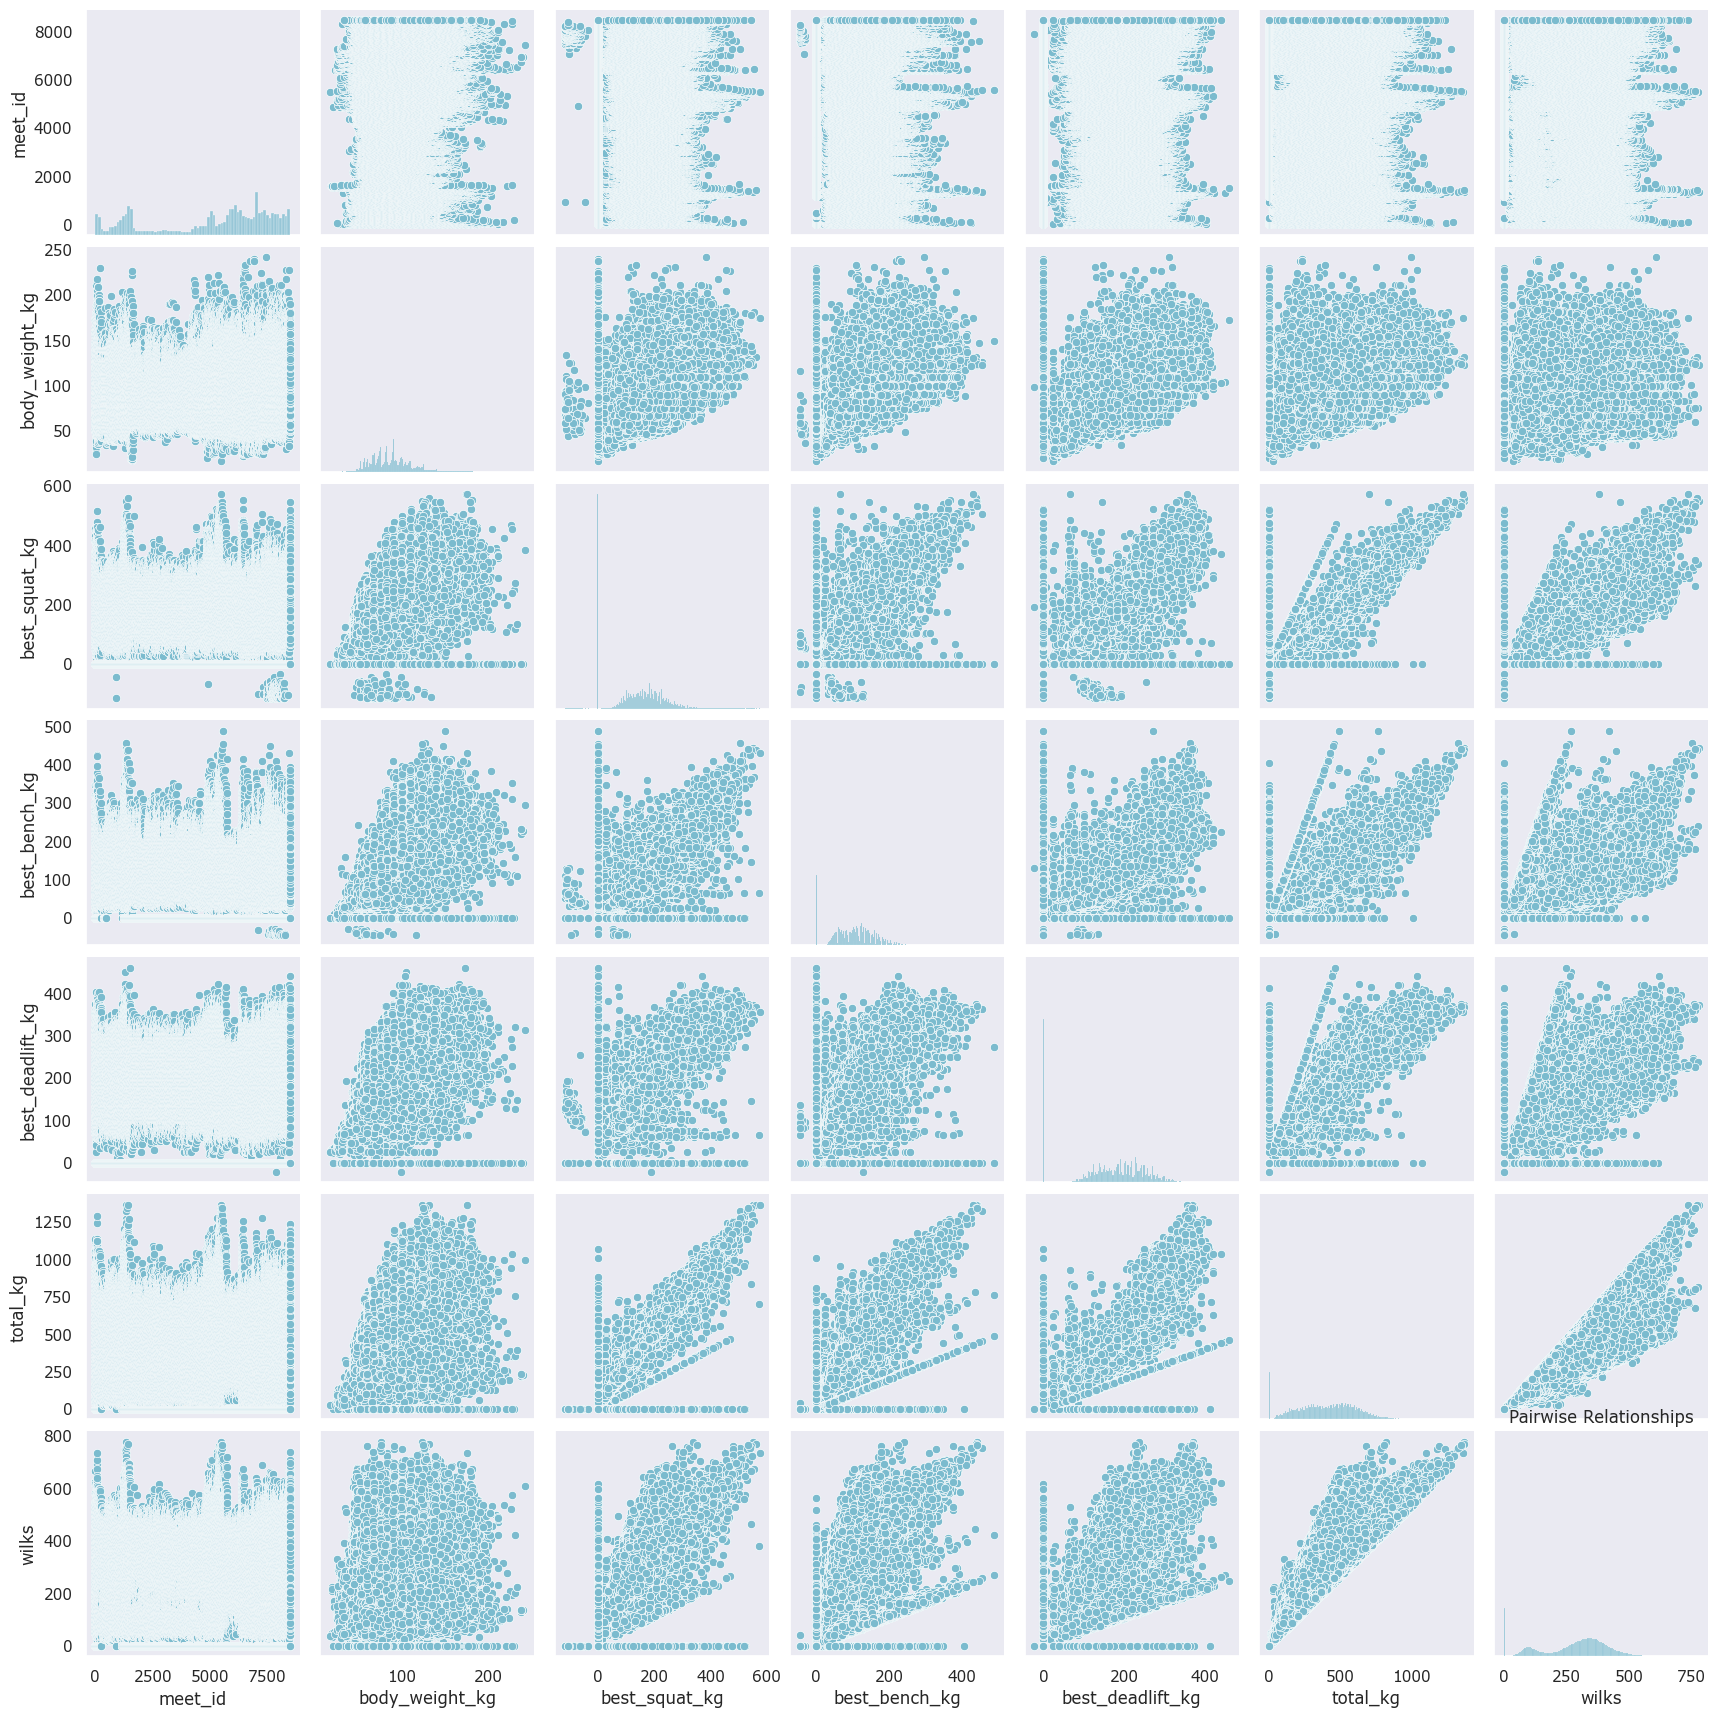

In [49]:
sns.pairplot(df)
plt.title("Pairwise Relationships")
plt.show()

- **We can see positive relationships between many features like [`best squat` and `total kg`], [`wilks` and `total kg`], etc....**

**2. Heatmap using `pearson` and `spearman`** 

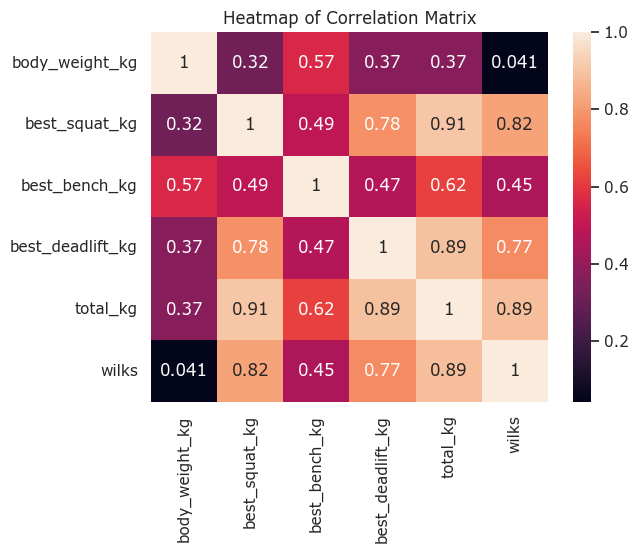

In [ ]:
# Compute the correlation matrix "Spearman"
corr = df[numer_col].corr(method="spearman")

# Plot the heatmap
sns.heatmap(corr, annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

- **Strong relaions between [`total kg`, `wilks`] and [`best squat`, `best deadlift`] which means that powerlifters who score a `high` best squat or best deadlift score `more` Kg lifted or wilks**
- **`Wilks` and `total kg` have a very strong relationship `0.9` as we discussed above why is that**

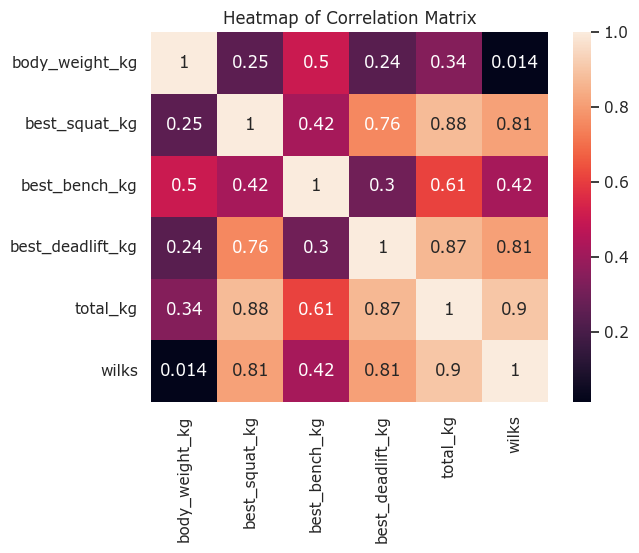

In [ ]:
# Compute the correlation matrix "Pearson"
corr = df[numer_col].corr(method="pearson")

# Plot the heatmap
sns.heatmap(corr, annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

- **No negative relationships sighted**